In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
#aggiunte io:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [118]:
#data = pd.read_csv('../data/MushroomDataset/processed_secondary_data.csv')

#dataset after dropping redundant features
data = pd.read_csv('../data/MushroomDataset/processed_secondary_data_after_analysis.csv')

Poisonous mushrooms have a class of "1", edible "0".

In [119]:
X = data.drop(columns=['class'])
y = data['class']

## Train-test split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [121]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [122]:
y_pred = model.predict(X_test)

In [123]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7769772392336662
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      5436
           1       0.80      0.80      0.80      6778

    accuracy                           0.78     12214
   macro avg       0.77      0.77      0.77     12214
weighted avg       0.78      0.78      0.78     12214

Confusion Matrix:
 [[4080 1356]
 [1368 5410]]


In [124]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8593055031742527


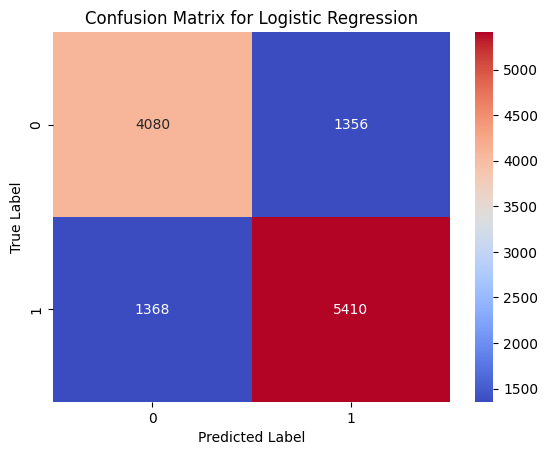

In [125]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Applying GridSearch to find best hyperparameters

In [126]:
parameter_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    ]

# Grid Search with 5-fold Cross-Validation

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=5000),
    param_grid=parameter_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,  # displaying the process
)


#### Evaluating the best model

In [127]:
#fitting the model
grid_search_lr.fit(X_train, y_train)

#best parameters
best_params = grid_search_lr.best_params_
best_model = grid_search_lr.best_estimator_

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", accuracy)
print("Solver used in the best model:", best_model.solver)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Set Accuracy: 0.7769772392336662
Solver used in the best model: liblinear


#### For original dataset:
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Accuracy: 0.7777140985754053
Solver used in the best model: liblinear

#### For dataset without the redundant features
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Set Accuracy: 0.7769772392336662
Solver used in the best model: liblinear


# Random Forest Classifier


With max_depth set to none, it was overfitting, achieveing no fale positives and false negatives. With accuracy equaly to 1.0. With max_depth=10, accuracy of Accuracy: 0.9772 and for max_depth=7, accuaracy of Accuracy of 

In [128]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=7)
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [129]:
y_pred_3= model3.predict(X_test)

Random Forest Results:
Accuracy: 0.9103
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      5436
           1       0.92      0.92      0.92      6778

    accuracy                           0.91     12214
   macro avg       0.91      0.91      0.91     12214
weighted avg       0.91      0.91      0.91     12214

Confusion Matrix:
 [[4860  576]
 [ 519 6259]]


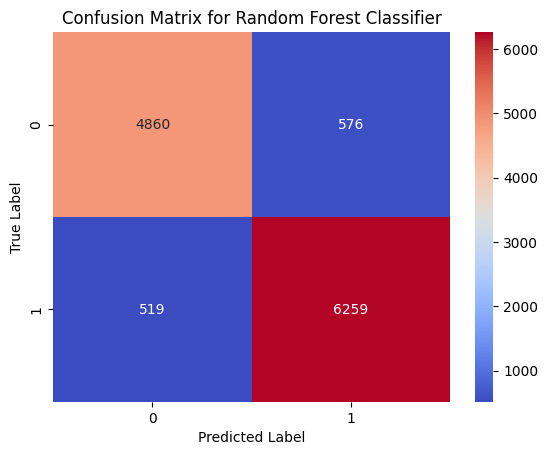

In [130]:
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_3):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_3))

sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

It seems our classifier achieved perfect accuracy, meaning there were no false positives or false negatives. 

In [131]:
y_prob_3 = model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_3)
print("ROC-AUC Score:", roc_auc_rf)

ROC-AUC Score: 0.8593055031742527


Since the accuracy is really high we need to check if the model is overfitting on the training set

In [132]:
#check test and train accuracies
train_accuracy_3 = accuracy_score(y_train, model3.predict(X_train))
test_accuracy_3 = accuracy_score(y_test, y_pred_3)

print(f"Training Accuracy: {train_accuracy_3:.4f}")
print(f"Test Accuracy: {test_accuracy_3:.4f}")

Training Accuracy: 0.9114
Test Accuracy: 0.9103


I evaluate the model using also the cross validation:

In [133]:
cv_scores = cross_val_score(model3, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.56549861 0.50720485 0.56656296 0.61986245 0.75395071]
Mean CV Accuracy: 0.6026


since Mean CV Accuracy is lower than the Test Accuracy the model is overfitting on the training set.

In [134]:
model3_limited = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,           
    min_samples_split=10,    
    min_samples_leaf=5       
)

model3_limited.fit(X_train, y_train)
y_pred_3_limited = model3_limited.predict(X_test)

Also with these parameters the model overfits on the training data:

In [135]:
print("Limited Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_3_limited):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_3_limited))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_3_limited))

Limited Random Forest Results:
Accuracy: 0.9772
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      5436
           1       0.98      0.98      0.98      6778

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214

Confusion Matrix:
 [[5309  127]
 [ 152 6626]]


In [136]:
#check test and train accuracies
train_accuracy_lim = accuracy_score(y_train, model3_limited.predict(X_train))
test_accuracy_lim = accuracy_score(y_test, y_pred_3_limited)

print(f"Training Accuracy: {train_accuracy_lim:.4f}")
print(f"Test Accuracy: {test_accuracy_lim:.4f}")

# cross validation
cv_scores = cross_val_score(model3_limited, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Training Accuracy: 0.9782
Test Accuracy: 0.9772
Cross-Validation Scores: [0.52914688 0.49803504 0.59996725 0.57425905 0.76279374]
Mean CV Accuracy: 0.5928


### Grid search


In [154]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X, y)
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5}
Best Accuracy: 0.6186304121975753


Results:

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5}
Best Accuracy: 0.6186304121975753


## Decision Tree Classifier

In [138]:
model2= DecisionTreeClassifier(criterion="entropy", random_state=42)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [139]:
y_pred2 = model2.predict(X_test)

In [140]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 0.9977075487145898
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

Confusion Matrix:
 [[5421   15]
 [  13 6765]]


In [141]:
y_prob_2 = model.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_2)
print("ROC-AUC Score:", roc_auc_dt)

ROC-AUC Score: 0.8593055031742527


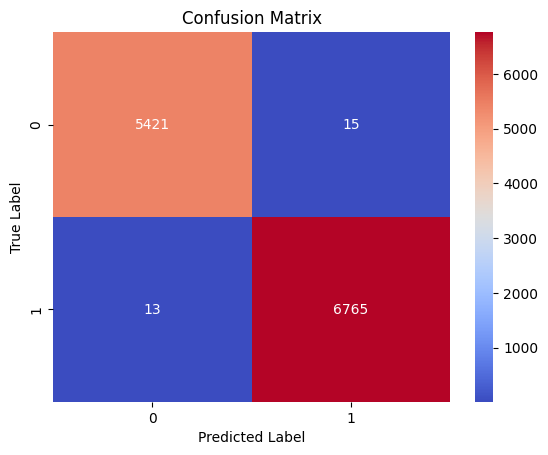

In [142]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

the model also overfits

In [143]:
train_accuracy = accuracy_score(y_train, model2.predict(X_train))
test_accuracy = accuracy_score(y_test, model2.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.1:  
    print("Possible overfitting in the model.")
else:
    print("The model is balanced.")


Training Accuracy: 1.0000
Test Accuracy: 0.9977
The model is balanced.


The accuracy is high on both sets, which indicates that the model is generalizing well and could mean that the model is too complex, so I check the depth, which if it is very high means that it probably has memorized the training set

In [144]:
print(model2.get_depth())  # depth
print(model2.get_n_leaves())  # N leaves

25
286


as I can see here:

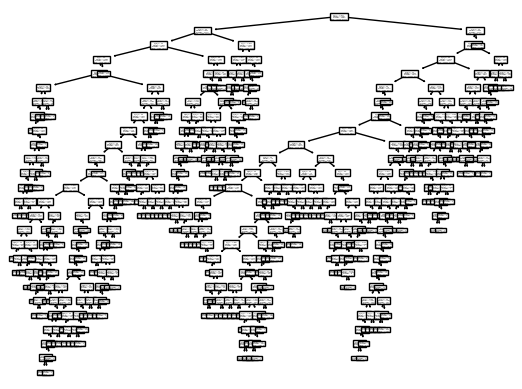

In [145]:
_ = tree.plot_tree(model2)

These values indicate that the model is probably very complex. This could be a sign of overfitting.

We can check if the model is overfitting using the cross validation

In [146]:
scores = cross_val_score(model2, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.49705256 0.49688882 0.63689209 0.52734567 0.66797675]
Mean CV Accuracy: 0.5652


Since the Mean CV Accuracy is lower than the Test Accuracy that was 0.9979, probably the model is overfitting on the training set

In [157]:
# Grid Search per Decision Tree
param_grid_tree = {'max_depth': [5, 10, 15, 20, 25, None], 'min_samples_split': [2, 5, 10]}
grid_search_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    cv=5,
    scoring='accuracy',
    verbose=1
)

grid_search_tree.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best Accuracy:", grid_search_tree.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best Accuracy: 0.9970934397707503


Result:

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}

Best Accuracy: 0.9970934397707503

## Ensemble

In [148]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier(random_state=42)
clf_rfor = RandomForestClassifier(random_state=42)

In [149]:
clf_voting_hard = VotingClassifier(
    estimators=[('lr', clf_logreg), ('dt', clf_tree), ('rf', clf_rfor)],
    voting='hard')
clf_voting_hard.fit(X_train, y_train)

/Users/alicjadorobis/opt/anaconda3/envs/bert_envv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))])

function to comprare accuracies of the three classifiers

In [150]:
from typing import List
def compare_classifiers_accuracies(clfs: List[object], X_train, X_test, y_train, y_test):
    """Fit each classifier and compare their accuracies."""
    for clf in clfs:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"{clf.__class__.__name__}:", accuracy_score(y_test, y_pred))


In [151]:
compare_classifiers_accuracies([clf_logreg, clf_tree,clf_rfor, clf_voting_hard], X_train, X_test, y_train, y_test)

/Users/alicjadorobis/opt/anaconda3/envs/bert_envv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.7773047322744392
DecisionTreeClassifier: 0.9971344358932372
RandomForestClassifier: 1.0


/Users/alicjadorobis/opt/anaconda3/envs/bert_envv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier: 0.9986900278369084


with soft voting

In [152]:
clf_voting_soft = VotingClassifier(
    estimators=[('lr', clf_logreg), ('dt', clf_tree)],
    voting='soft')
clf_voting_soft.fit(X_train, y_train)

/Users/alicjadorobis/opt/anaconda3/envs/bert_envv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [153]:
compare_classifiers_accuracies([clf_logreg,  clf_tree, clf_rfor, clf_voting_soft], X_train, X_test, y_train, y_test)

/Users/alicjadorobis/opt/anaconda3/envs/bert_envv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.7773047322744392
DecisionTreeClassifier: 0.9971344358932372
RandomForestClassifier: 1.0


/Users/alicjadorobis/opt/anaconda3/envs/bert_envv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier: 0.9971344358932372


maybe we can do the pruning on the decision tree to have a max depth